# PCA for NBA PGs 

In [2]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import data, check shape, table and basic stats

In [3]:
NBA_stats = pd.read_csv('/Users/nikanesiadis/Desktop/CHE_DS_course/My_Course/My_Notes/Lecture_4_Unsupervised_I/Code_examples/NBA_Players_2015_2016_v2_SG.csv')

In [4]:
NBA_stats.shape

(435, 31)

In [5]:
NBA_stats

NAME-F        PLAYER POS  GP  GS   MIN   PPG  OFFR  DEFR   RPG  ...   \
0        Aaron        Brooks  PG  18   0  15.3   8.1   0.6   1.4   1.9  ...    
1        Aaron        Gordon  PF  28   0  18.6   6.9   1.6   3.0   4.6  ...    
2        Aaron      Harrison  SG   5   0   4.6   1.4   0.2   0.6   0.8  ...    
3      Adreian         Payne  PF  21   2   9.8   2.7   0.4   2.0   2.5  ...    
4           Al       Horford   C  31  31  31.3  15.0   2.0   4.9   6.9  ...    
5           Al     Jefferson   C  17  17  26.2  13.7   1.3   5.1   6.4  ...    
6    Al-Farouq         Aminu  SF  31  31  30.2  10.9   1.3   5.6   6.9  ...    
7         Alec         Burks  SG  27   3  27.5  14.4   0.6   3.0   3.6  ...    
8         Alex           Len   C  31  12  18.8   7.3   1.9   4.0   5.9  ...    
9       Alexis        Ajinca   C  21   6  12.8   5.2   1.2   2.8   4.0  ...    
10       Allen        Crabbe  SF  31   2  24.7  10.2   0.3   2.0   2.3  ...    
11      Alonzo           Gee  SF  28  20  21.5   4.1   0.7   2.3   3.0  ...    
12      Amar'e    Stoudemire  PF   3   0   9.0   4.3   1.0   1.0   2.0  ...    
13        Amir       Johnson  PF  27  24  23.4   7.5   1.8   3.9   5.7  ...    
14    Anderson       Varejao  PF  22   0   8.7   2.1   0.7   1.8   2.5  ...    
15       Andre      Drummond   C  30  30  35.1  18.2   5.5  10.5  16.1  ...    
16       Andre      Iguodala  SF  28   0  27.8   7.6   1.1   3.5   4.6  ...    
17       Andre        Miller  PG  15   0  12.5   3.9   0.3   0.7   1.1  ...    
18       Andre      Roberson  SG  28  28  22.5   4.9   1.1   2.3   3.4  ...    
19      Andrea      Bargnani   C  25   0  15.2   8.0   0.8   1.8   2.7  ...    
20      Andrew         Bogut   C  21  17  19.8   5.6   1.7   5.3   7.0  ...    
21      Andrew     Nicholson  PF  20   0  18.7   8.2   0.8   3.6   4.4  ...    
22      Andrew       Wiggins  SG  28  28  34.7  20.9   1.5   2.1   3.6  ...    
23     Anthony       Bennett  PF  10   0   5.8   1.9   0.5   1.2   1.7  ...    
24     Anthony         Brown  SF   7   1   9.3   1.6   0.1   0.4   0.6  ...    
25     Anthony         Davis  PF  25  25  35.8  23.4   1.9   8.8  10.8  ...    
26     Anthony        Morrow  SG  27   4  15.6   5.4   0.2   0.9   1.1  ...    
27     Anthony      Tolliver  PF  29   0  20.2   4.6   0.6   2.9   3.5  ...    
28      Archie       Goodwin  SG  15   0  11.2   5.1   0.1   2.1   2.2  ...    
29        Aron        Baynes   C  29   0  13.4   4.6   1.6   2.4   4.0  ...    
..         ...           ...  ..  ..  ..   ...   ...   ...   ...   ...  ...    
405       Tony        Parker  PG  29  29  26.8  13.1   0.3   2.0   2.3  ...    
406       Tony         Snell  SF  25  21  22.8   5.6   0.3   3.2   3.5  ...    
407       Tony        Wroten  SG   8   3  18.0   8.4   0.3   2.4   2.6  ...    
408     Trevor         Ariza  SF  29  29  34.5  11.3   0.8   4.6   5.4  ...    
409     Trevor        Booker  PF  26   2  21.9   5.4   2.4   3.6   6.0  ...    
410       Trey         Burke  PG  27   0  23.3  11.4   0.4   1.8   2.2  ...    
411       Trey         Lyles  PF  25  11  13.3   2.6   0.8   2.3   3.1  ...    
412    Tristan      Thompson   C  26   3  26.9   7.1   3.1   6.8   9.9  ...    
413       Troy       Daniels  SG  12   0   5.2   2.7   0.0   0.4   0.4  ...    
414         Ty        Lawson  PG  27  11  25.3   6.1   0.5   1.4   1.9  ...    
415      Tyler         Ennis  PG  13   5  11.1   3.8   0.2   1.1   1.3  ...    
416      Tyler    Hansbrough  PF  14   0   6.4   2.4   0.6   1.0   1.6  ...    
417      Tyler       Johnson  SG  20   0  20.9   9.1   0.8   1.5   2.3  ...    
418      Tyler        Zeller   C  19   3   8.5   4.9   0.6   1.3   1.9  ...    
419     Tyreke         Evans  SG  11  11  32.0  16.4   1.0   5.0   6.0  ...    
420      Tyson      Chandler   C  22  19  22.5   4.5   2.1   5.2   7.3  ...    
421       Tyus         Jones  PG   3   0  11.3   2.3   0.0   0.7   0.7  ...    
422     Udonis        Haslem  PF  13   0   9.0   1.5   0.1   2.0   2.1  ...    
423     

In [6]:
NBA_stats.describe()

GP          GS         MIN         PPG        OFFR        DEFR  \
count  435.000000  435.000000  435.000000  435.000000  435.000000  435.000000   
mean    21.526437   10.000000   19.778756    8.095241    0.853716    2.731103   
std      8.522733   11.489125    9.776181    5.852616    0.818387    1.878475   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     16.000000    0.000000   11.750000    3.600000    0.300000    1.300000   
50%     25.000000    3.000000   19.900000    7.000000    0.600000    2.300000   
75%     28.000000   22.000000   28.200000   11.350000    1.150000    3.700000   
max     31.000000   31.000000   38.200000   31.200000    5.500000   10.500000   

              RPG         APG         SPG         BPG     ...             3PA  \
count  435.000000  435.000000  435.000000  435.000000     ...      435.000000   
mean     3.582154    1.756498    0.647784    0.406866     ...        1.907679   
std      2.562394    1.755055    0.483913    0.485416     ...        1.887787   
min      0.000000    0.000000    0.000000    0.000000     ...        0.000000   
25%      1.700000    0.600000    0.290000    0.090000     ...        0.250000   
50%      3.000000    1.200000    0.560000    0.250000     ...        1.400000   
75%      4.700000    2.200000    0.930000    0.540000     ...        3.200000   
max     16.100000   11.300000    2.340000    4.000000     ...       10.600000   

              3P%         FTM         FTA         FT%         2PM         2PA  \
count  435.000000  435.000000  435.000000  435.000000  435.000000  435.000000   
mean     0.260960    1.420774    1.895457    0.693629    2.348916    4.885846   
std      0.180485    1.404375    1.766395    0.228776    1.819564    3.653948   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.105500    0.500000    0.600000    0.610000    0.900000    2.150000   
50%      0.310000    1.000000    1.300000    0.750000    2.000000    4.100000   
75%      0.375000    1.900000    2.700000    0.840000    3.200000    6.750000   
max      1.000000    9.500000   10.900000    1.000000    9.300000   17.900000   

              2P%         PPS        AFG%  
count  435.000000  435.000000  435.000000  
mean     0.463783    1.161119    0.479470  
std      0.130536    0.322495    0.121938  
min      0.000000    0.000000    0.000000  
25%      0.423000    1.036000    0.450000  
50%      0.478000    1.169000    0.490000  
75%      0.524000    1.289500    0.530000  
max      1.000000    3.500000    1.250000  

[8 rows x 28 columns]

## Filter the PGs 

In [7]:
Guards = NBA_stats.loc[NBA_stats['POS'] == 'PG']

In [8]:
Guards

NAME-F      PLAYER POS  GP  GS        MIN        PPG      OFFR  \
0       Aaron      Brooks  PG  18   0  15.300000   8.100000  0.600000   
17      Andre      Miller  PG  15   0  12.500000   3.900000  0.300000   
31     Austin      Rivers  PG  28   5  22.100000   7.000000  0.500000   
32      Avery     Bradley  PG  27  23  31.800000  15.400000  0.400000   
34       Beno       Udrih  PG  21   1  14.071429   4.661905  0.238095   
44    Brandon      Knight  PG  31  30  35.700000  19.800000  0.800000   
46      Brian     Roberts  PG  13   0   7.600000   2.200000  0.100000   
51       C.J.      Watson  PG   8   0  19.500000   4.800000  0.500000   
54    Cameron       Payne  PG  14   0   4.600000   2.000000  0.000000   
67      Chris        Paul  PG  24  24  32.200000  17.500000  0.400000   
77       Cory      Joseph  PG  30   0  26.900000   9.000000  0.600000   
80       D.J.    Augustin  PG  29   0  16.100000   4.600000  0.200000   
81   D'Angelo     Russell  PG  29  22  28.100000  11.900000  0.800000   
82     Damian     Lillard  PG  29  29  36.500000  24.600000  0.700000   
89     Darren    Collison  PG  24   3  28.900000  13.600000  0.400000   
95      Delon      Wright  PG   5   0   3.400000   0.000000  0.200000   
99     Dennis    Schroder  PG  31   6  21.800000  10.800000  0.400000   
100     Deron    Williams  PG  26  26  32.700000  14.800000  0.300000   
102   Derrick        Rose  PG  24  24  32.900000  13.500000  0.400000   
105     Devin      Harris  PG  24   0  20.800000   7.700000  0.300000   
110    Donald       Sloan  PG  11   0  11.100000   2.600000  0.400000   
120    Elfrid      Payton  PG  29  29  31.000000  11.900000  1.100000   
122  Emmanuel      Mudiay  PG  23  23  29.100000  10.700000  0.800000   
124      Eric     Bledsoe  PG  30  30  35.000000  20.900000  0.600000   
127     Erick       Green  PG   3   0   2.300000   0.000000  0.000000   
135      Gary        Neal  PG  24   2  22.100000  10.500000  0.300000   
136    George        Hill  PG  25  25  34.600000  12.200000  0.500000   
141     Goran      Dragic  PG  26  26  31.400000  11.300000  0.700000   
145   Greivis     Vasquez  PG  16   0  22.600000   7.100000  0.300000   
152    Isaiah      Canaan  PG  31  18  26.800000  10.900000  0.200000   
..        ...         ...  ..  ..  ..        ...        ...       ...   
327     Patty       Mills  PG  30   0  20.900000   8.500000  0.300000   
332      Phil     Pressey  PG  14   0  12.100000   3.900000  0.000000   
335     Rajon       Rondo  PG  28  28  35.700000  12.400000  1.300000   
336     Ramon    Sessions  PG  27   0  20.500000   9.700000  0.200000   
340      Raul        Neto  PG  26  25  16.900000   5.200000  0.200000   
341       Ray    McCallum  PG  12   1   7.600000   1.800000  0.100000   
342   Raymond      Felton  PG  29  17  28.200000   9.400000  0.300000   
344    Reggie     Jackson  PG  30  30  31.600000  20.300000  0.900000   
347     Ricky       Rubio  PG  23  23  29.900000   9.600000  1.000000   
352    Rodney     Stuckey  PG  23   0  25.000000  10.800000  0.400000   
354    Ronnie       Price  PG  29   0  13.800000   3.900000  0.200000   
358      Russ       Smith  PG  14   0   4.200000   1.600000  0.100000   
359   Russell   Westbrook  PG  29  29  34.100000  25.300000  1.700000   
371   Shabazz      Napier  PG  25   0  12.400000   4.100000  0.200000   
372     Shane      Larkin  PG  25   1  19.100000   7.200000  0.200000   
373     Shaun  Livingston  PG  26   0  20.500000   5.400000  0.600000   
375   Shelvin        Mack  PG  10   0   9.000000   4.100000  0.100000   
378   Spencer   Dinwiddie  PG   9   0  12.300000   4.400000  0.000000   
381   Stephen       Curry  PG  28  28  34.900000  31.200000  0.700000   
382     Steve       Blake  PG  26   0  16.000000   4.500000  0.200000   
385      T.J.   McConnell  PG  31  16  24.300000   6.600000  0.700000   
392     Terry      Rozier  PG  16   0   6.000000   1.700000  0.400000   
399       Tim     Frazier  PG  17   1   7.100000   1.300000  0.20

In [9]:
Guards.shape

(90, 31)

## Drop unnecessary columns and reset index

In [10]:
Guards_Names = Guards.drop(['NAME-F', 'POS'], axis=1)

In [11]:
Guards_Names.set_index('PLAYER', inplace=True)

## Standardize data

In [12]:
Guards_scaled = StandardScaler().fit_transform(Guards_Names)

In [13]:
Guards_scaled

array([[-0.45807459, -0.8864905 , -0.71474405, ...,  0.10261562,
         0.21896437,  0.38974449],
       [-0.81865808, -0.8864905 , -1.01029568, ...,  1.51086923,
         1.27567607,  1.40170751],
       [ 0.7438704 , -0.46745613,  0.00302421, ...,  0.75851456,
        -0.15816596,  0.02175794],
       ..., 
       [-1.05904708, -0.46745613, -1.1580715 , ...,  0.20871692,
         0.15175302,  0.29774785],
       [-2.26099207, -0.8864905 , -1.13696067, ..., -1.28634684,
        -1.83098166, -1.81817484],
       [ 0.86406489, -0.38364925,  0.27746502, ...,  0.44021067,
         0.37205688,  0.29774785]])

In [14]:
from scipy import stats
stats.describe(Guards_scaled)

DescribeResult(nobs=90, minmax=(array([-2.38118657, -0.8864905 , -2.08694807, -1.50071796, -1.39022778,
       -1.76519742, -1.77147334, -1.4950028 , -1.64042129, -0.92625892,
       -1.64869222, -2.29493335, -2.81853213, -3.86619084, -1.57287157,
       -1.64929848, -4.17133277, -1.15171204, -1.31924499, -2.55016736,
       -1.12088266, -1.19550228, -3.45878494, -1.51713811, -1.61397802,
       -4.18001862, -4.00788246, -4.1180908 ]), array([ 1.10445389,  1.71152263,  1.52300405,  3.47830055,  4.17553368,
        2.87566732,  3.16137967,  3.33969688,  2.60991907,  2.93802477,
        2.69269168,  2.16952481,  2.72015039,  3.05173346,  3.15021949,
        2.49302781,  1.97891524,  4.95092895,  4.14052514,  3.01574874,
        3.16427886,  3.23363155,  1.1697281 ,  3.05073315,  2.66527477,
        1.54945152,  1.83950458,  1.76969407])), mean=array([  1.51730480e-16,   4.31753398e-17,  -1.28292438e-16,
         2.83723662e-16,  -1.99840144e-16,   1.72701359e-17,
        -1.85037171e-17,

## Perform PCA

In [15]:
pca = PCA(n_components=2, svd_solver='full')

In [16]:
PC = pca.fit_transform(Guards_scaled)

### Extract the scores (90 players (rows), 2 scores (columns))

In [17]:
scores_pd = pd.DataFrame(data = PC
                         ,columns = ['PC1', 'PC2']
                         ,index = Guards_Names.index)

In [18]:
scores_pd

PC1       PC2
PLAYER                         
Brooks      -0.978485 -1.403351
Miller      -1.984773 -4.403770
Rivers      -1.304246 -0.181931
Bradley      2.721249 -0.181971
Udrih       -2.522885 -2.539144
Knight       5.781506  1.358993
Roberts     -4.942291 -1.308795
Watson      -2.415643 -1.017307
Payne       -4.842289 -1.291551
Paul         5.080851 -0.082824
Joseph       0.546841 -0.927652
Augustin    -2.696283 -1.691010
Russell      2.032824  0.981056
Lillard      7.480624  1.903156
Collison     1.625723 -1.254760
Wright      -9.726649  6.761368
Schroder     0.886793 -0.491278
Williams     3.404569  0.203313
Rose         2.086482  2.208353
Harris      -0.387267 -1.413798
Sloan       -4.113471 -0.853941
Payton       3.081289  1.410344
Mudiay       1.977009  3.588373
Bledsoe      6.984493  1.635143
Green       -9.953471  6.535376
Neal        -0.310562 -1.797371
Hill         2.382208  0.199262
Dragic       2.254124  0.566672
Vasquez     -1.244739 -0.088422
Canaan       0.476349  0.342875
...               ...       ...
Mills       -0.455575 -2.304832
Pressey     -3.173751 -0.512001
Rondo        5.246797  1.488308
Sessions     0.204958 -1.810559
Neto        -1.797840 -1.057237
McCallum    -4.739465 -1.368763
Felton       0.769400  0.100214
Jackson      5.871957  1.178217
Rubio        2.923517  1.604290
Stuckey      0.610376  0.008689
Price       -2.414513 -2.572997
Smith       -5.379922 -0.974868
Westbrook   10.222873  2.718134
Napier      -3.528568 -0.812087
Larkin      -0.328629 -2.213666
Livingston  -1.582403 -1.821223
Mack        -3.339492 -2.692037
Dinwiddie   -3.665898 -1.059186
Curry       10.353079  0.127787
Blake       -2.631571 -1.172756
McConnell    0.957178 -0.591652
Rozier      -6.008668  1.081729
Frazier     -5.602829  0.698853
Douglas     -1.357069 -2.149483
Parker       2.607749 -2.536940
Burke        0.356152 -1.053670
Lawson      -1.217297  0.586067
Ennis       -3.582691 -1.334513
Jones       -6.056813  1.858956
LaVine       2.479901 -0.064807

[90 rows x 2 columns]

### Extract the loadings (new dimension directions, compared to the old 28) 

In [19]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = Guards_Names.columns)

In [20]:
loadings_pd

PC1       PC2
GP    0.178631 -0.113933
GS    0.191790  0.151176
MIN   0.227103  0.062440
PPG   0.233741  0.073457
OFFR  0.174918  0.125008
DEFR  0.214153  0.109256
RPG   0.215845  0.115188
APG   0.198083  0.097449
SPG   0.198088  0.091768
BPG   0.140961  0.117559
TPG   0.212985  0.121400
FPG   0.170096  0.041133
A/TO  0.052969 -0.241714
PER   0.206276 -0.151431
FGM   0.233457  0.063469
FGA   0.231118  0.107188
FG%   0.150709 -0.387771
3PM   0.176830  0.015987
3PA   0.184274  0.061761
3P%   0.133322 -0.273086
FTM   0.207485  0.115527
FTA   0.209481  0.126953
FT%   0.115437 -0.286315
2PM   0.222403  0.075633
2PA   0.218289  0.114598
2P%   0.138925 -0.373748
PPS   0.173583 -0.338828
AFG%  0.153686 -0.393952

## Plot the scores and loadings

In [21]:
def myplot(score,coeff,loading_labels=None,score_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xf = xs * scalex
    yf = ys * scaley
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xf, yf)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.4, coeff[i,1]*2.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.grid()



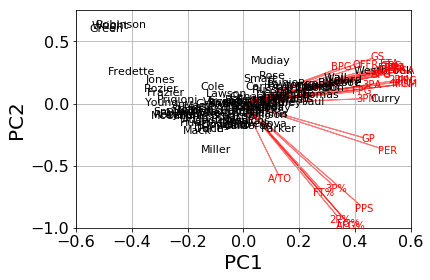

In [22]:
plt.rcParams["figure.figsize"] = [16,9]

myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(-0.6,0.6)
plt.ylim(-1,0.75)
plt.show()

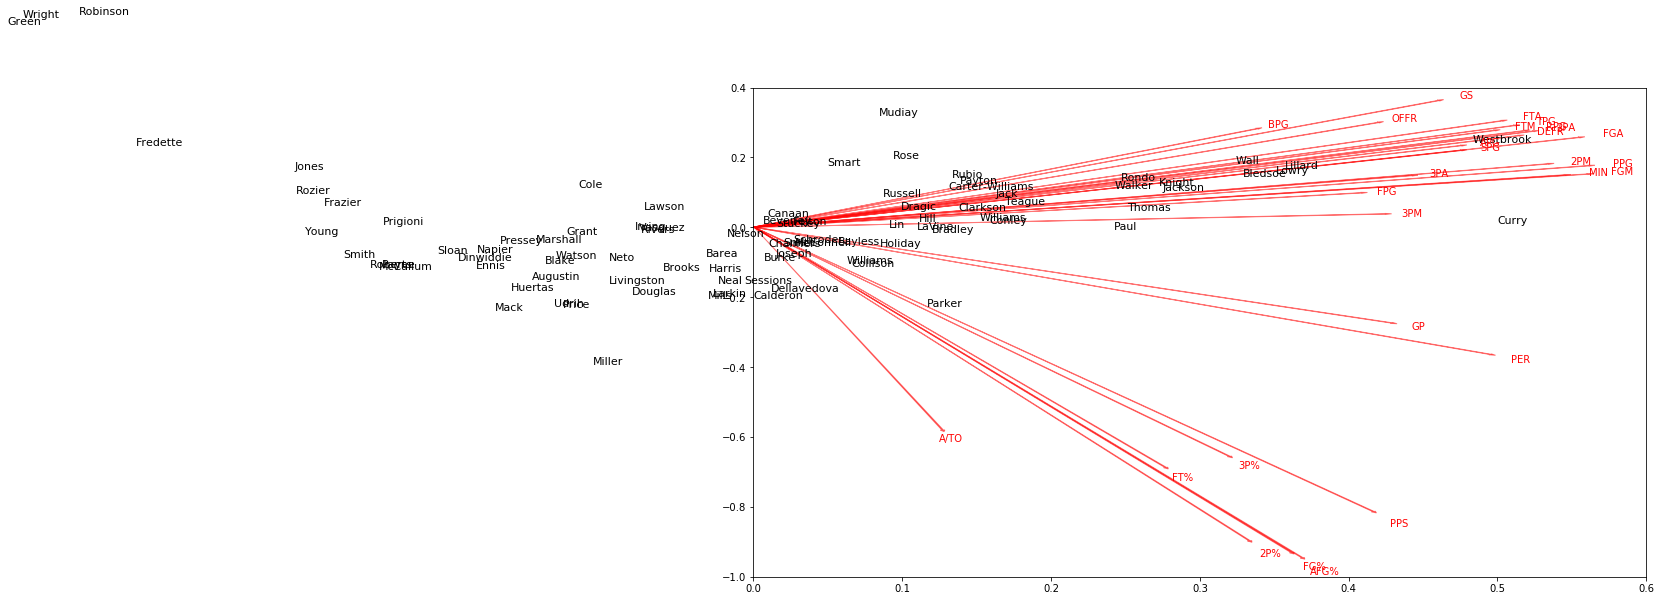

In [23]:
myplot(PC,np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(0,0.6)
plt.ylim(-1,0.4)
plt.show()

### Some PCA diagnostics

In [24]:
pca.explained_variance_

array([ 16.67582154,   3.57968407])

In [25]:
pca.explained_variance_ratio_

array([ 0.59556506,  0.12784586])

### Run more components

In [26]:
pca10 = PCA(n_components=10, svd_solver='full')

In [27]:
pca10.fit(Guards_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

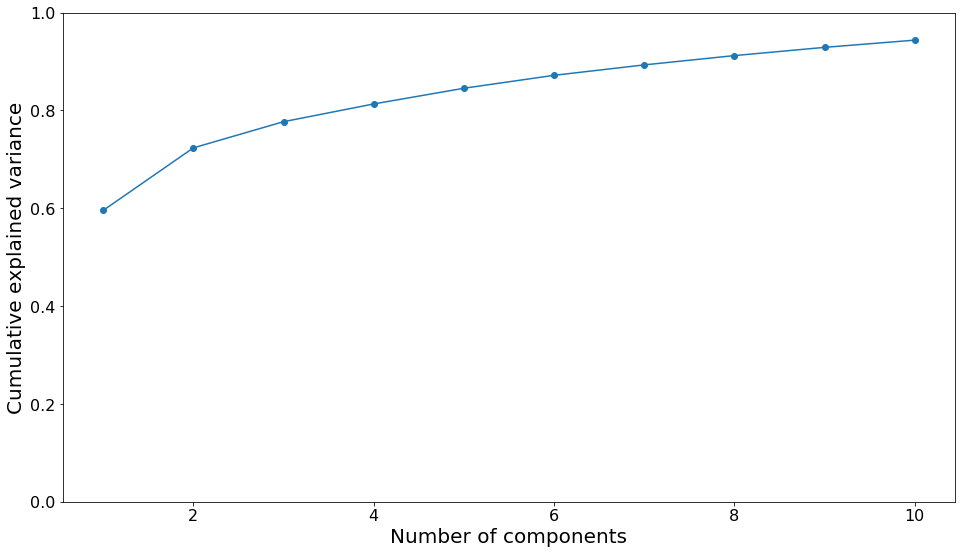

In [28]:
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

### Exploratory Data Analysis

In [29]:
#from pandas.plotting import scatter_matrix
pd.scatter_matrix(Guards_Names, alpha=0.2, diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb5b208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ec0e6a0>]], dtype=object)

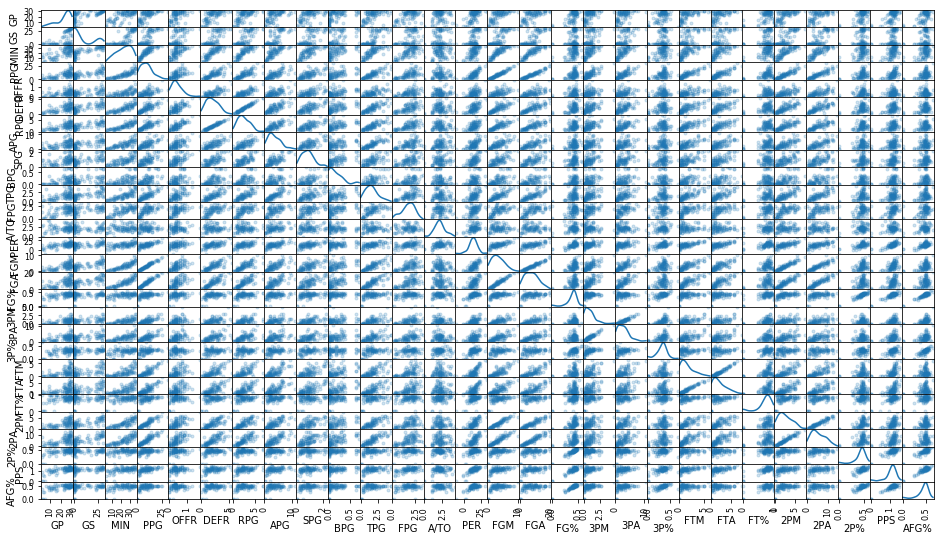

In [30]:
plt.show()

### Calculate and plot correlation between variables

In [31]:
import seaborn as sns

In [32]:
corr = Guards_Names.corr()

In [33]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

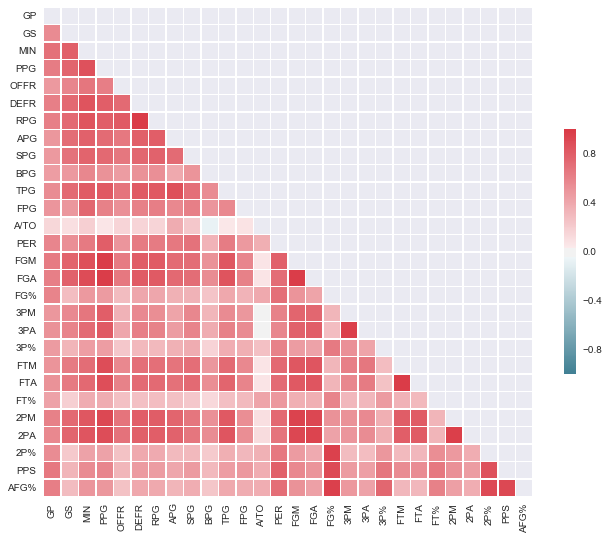

In [34]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

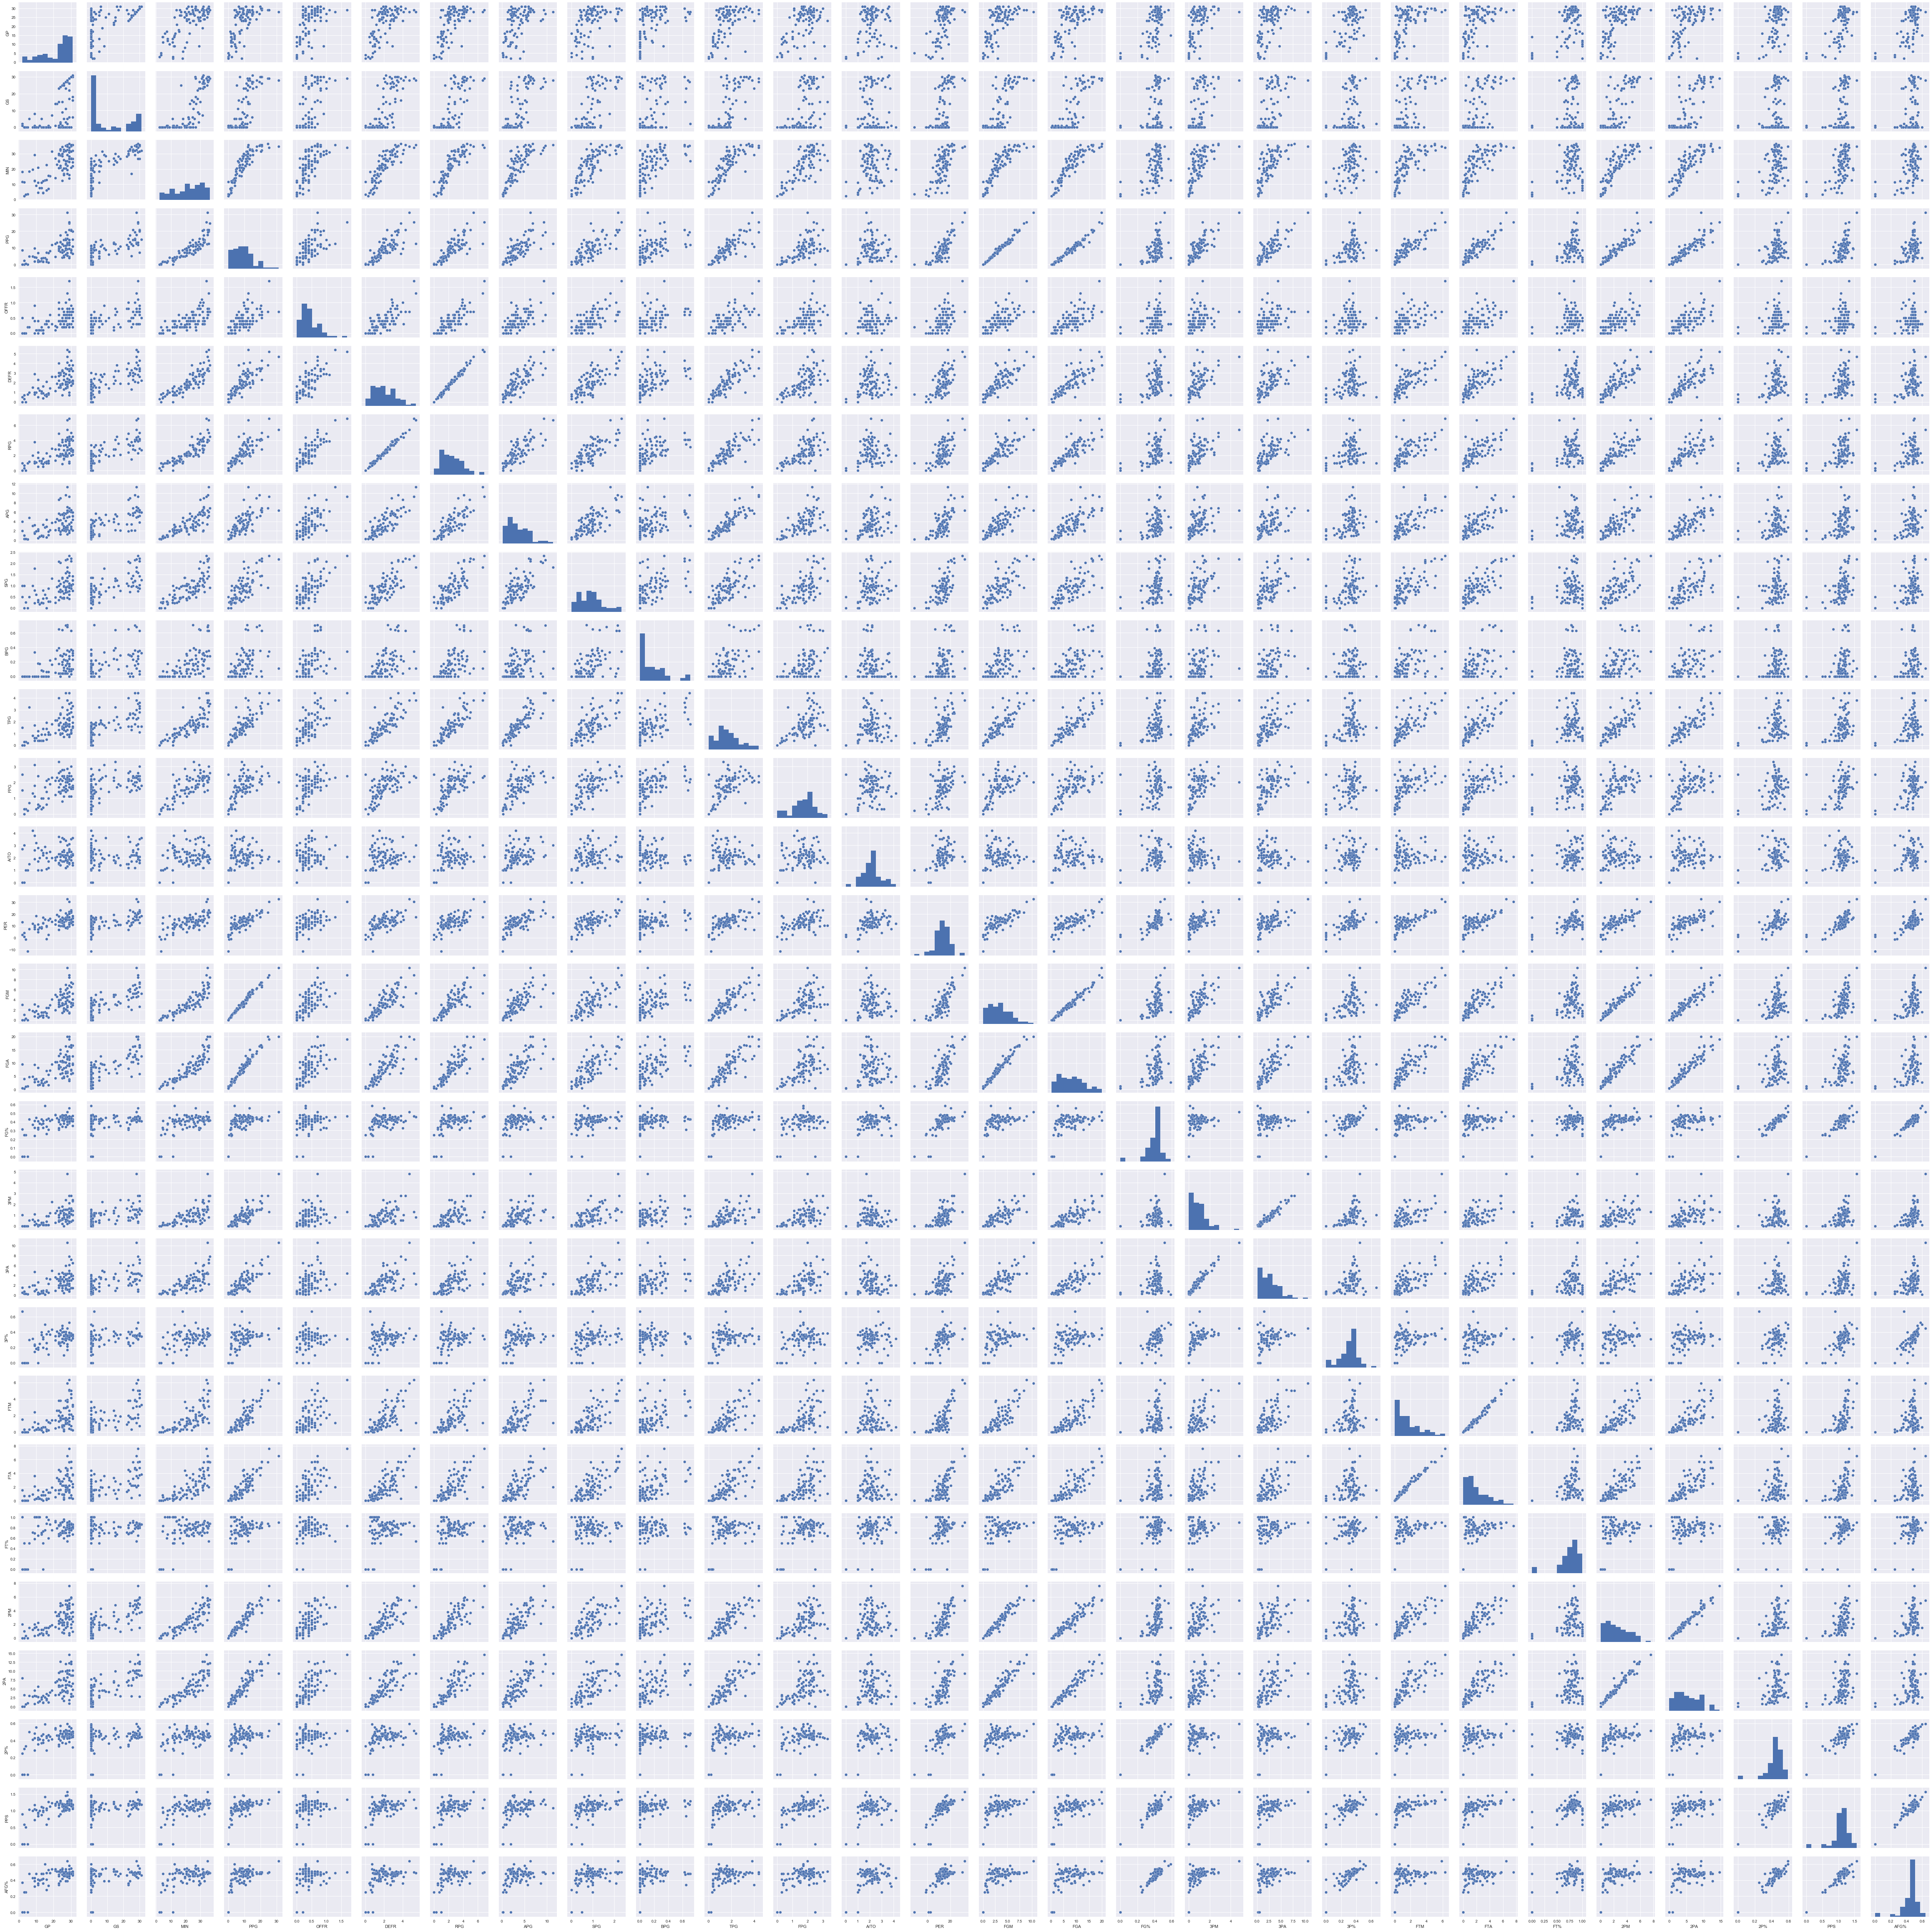

In [35]:
sns.pairplot(Guards_Names)
plt.show()

In [36]:
def loadings(coeff,loading_labels=None,score_labels=None):  
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*2.4, coeff[i,1]*2.4,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 2.5, coeff[i,1] * 2.5, loading_labels[i], color = 'r', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1), fontsize=20);
plt.ylabel("PC{}".format(2), fontsize=20);
plt.tick_params(labelsize=16)
plt.grid()



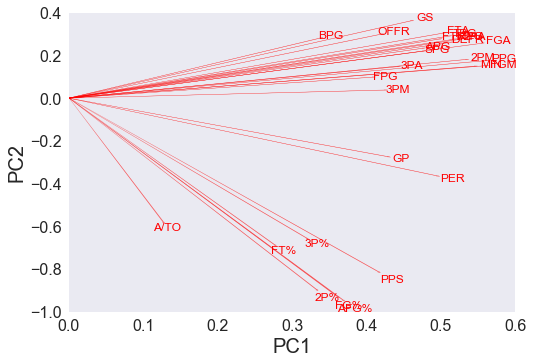

In [37]:
loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.xlim(0,0.6)
plt.ylim(-1,0.4)
plt.show()